## EDA and Data cleaning

In [1]:
import pandas as pd

In [21]:
df = pd.read_csv('..\Data\ExperimantalDataset_raw.csv')

df.head(10)

,helical_angle,helical_layer_count,hoop_angle,hoop_layer_count,doily1,doily2,total_layers,bust_pressure,avg_fibre_content,glass_transition_temprature,tensile_str,e1_gpa,youngs_modulus,poision_ratio,yeild_strength,ult_tensile_strength,liner_thickness,diameter
0,0,0,0,0.0,0,0,0.0,277,0.00,0.00,0.0,0.0,57.5,0.33,240.3,317,6,130
1,0,0,0,0.0,0,0,0.0,273,0.00,0.00,0.0,0.0,57.5,0.33,240.3,317,6,130
2,0,0,0,0.0,0,0,0.0,275,0.00,0.00,0.0,0.0,57.5,0.33,240.3,317,6,130
3,14,3,90,3.0,0,0,6.0,519,61.41,153.43,1082.0,108.3,57.5,0.33,240.3,317,6,130
4,14,3,90,3.0,0,0,6.0,383,61.41,153.43,1082.0,108.3,57.5,0.33,240.3,317,6,130
5,14,3,90,6.0,0,0,9.0,438,61.41,153.43,1082.0,108.3,57.5,0.33,240.3,317,6,130
6,14,3,90,9.0,0,0,12.0,552,61.41,153.43,1082.0,108.3,57.5,0.33,240.3,317,6,130
7,14,6,90,6.0,0,0,12.0,700,61.41,153.43,1082.0,108.3,57.5,0.33,240.3,317,6,130
8,14,6,90,6.0,0,0,12.0,556,61.41,153.43,1082.0,108.3,57.5,0.33,240.3,317,6,130
9,14,5,90,3.0,0,0,8.0,500,61.41,153.43,1082.0,108.3,57.5,0.33,240.3,317,6,130


In [22]:
!pip install -q seaborn

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# pd.plotting.scatter_matrix(df, figsize=(35, 35))
# plt.show()

In [25]:
# Getting the total numebes or doliy layers
df['doily_layers'] = df['doily1'] + df['doily2']
df.head()

,helical_angle,helical_layer_count,hoop_angle,hoop_layer_count,doily1,doily2,total_layers,bust_pressure,avg_fibre_content,glass_transition_temprature,tensile_str,e1_gpa,youngs_modulus,poision_ratio,yeild_strength,ult_tensile_strength,liner_thickness,diameter,doily_layers
0,0,0,0,0.0,0,0,0.0,277,0.00,0.00,0.0,0.0,57.5,0.33,240.3,317,6,130,0
1,0,0,0,0.0,0,0,0.0,273,0.00,0.00,0.0,0.0,57.5,0.33,240.3,317,6,130,0
2,0,0,0,0.0,0,0,0.0,275,0.00,0.00,0.0,0.0,57.5,0.33,240.3,317,6,130,0
3,14,3,90,3.0,0,0,6.0,519,61.41,153.43,1082.0,108.3,57.5,0.33,240.3,317,6,130,0
4,14,3,90,3.0,0,0,6.0,383,61.41,153.43,1082.0,108.3,57.5,0.33,240.3,317,6,130,0


In [ ]:
columns_to_drop = ['doily1', 'doily2', 'total_layers', 'hoop_angle', 'glass_transition_temprature', 'avg_fibre_content']
input_cols = ['bust_pressure',  'tensile_str', 'e1_gpa', 'youngs_modulus', 'poision_ratio', 'yeild_strength', 'diameter', 'ult_tensile_strength']
output_cols = ['helical_angle', 'helical_layer_count', 'hoop_layer_count', 'liner_thickness', 'doily_layers']

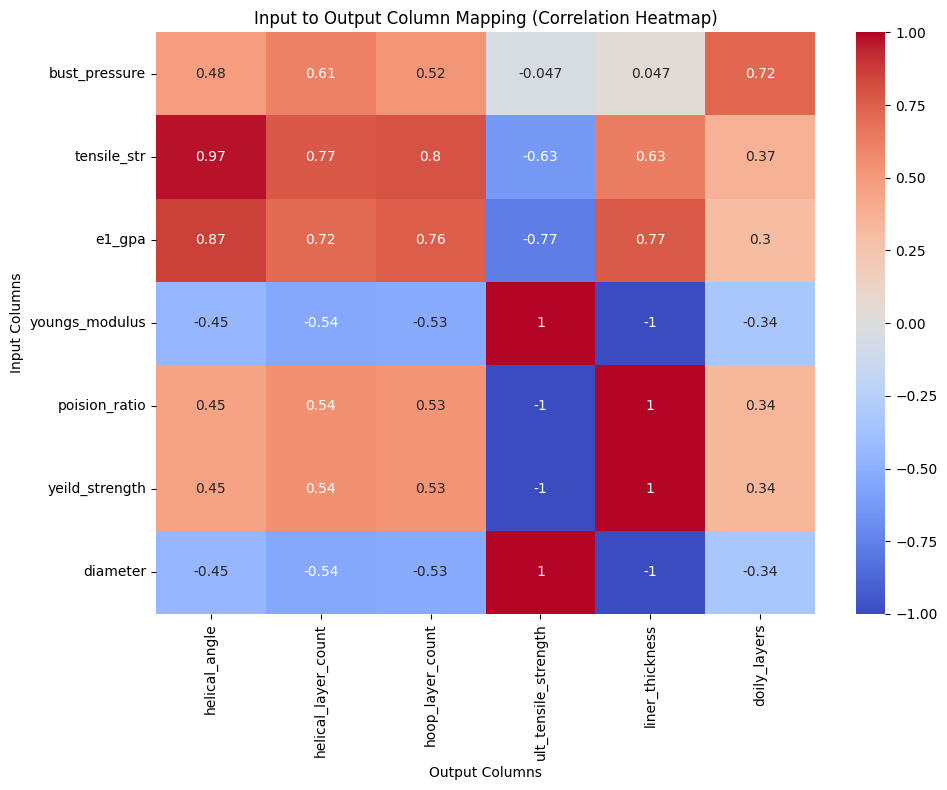

In [27]:
mapping_matrix = pd.DataFrame(index=input_cols, columns=output_cols)

# Fill matrix with correlation or other metric
for inp in input_cols:
    for out in output_cols:
        # Only compute correlation if both are numeric
        if pd.api.types.is_numeric_dtype(df[inp]) and pd.api.types.is_numeric_dtype(df[out]):
            mapping_matrix.loc[inp, out] = df[inp].corr(df[out])
        else:
            mapping_matrix.loc[inp, out] = None  # or 0, np.nan, etc.

# Convert to float for heatmap compatibility
mapping_matrix = mapping_matrix.astype(float)

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(mapping_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Input to Output Column Mapping (Correlation Heatmap)")
plt.xlabel("Output Columns")
plt.ylabel("Input Columns")
plt.tight_layout()
plt.show()


In [28]:
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,helical_angle,helical_layer_count,hoop_layer_count,bust_pressure,tensile_str,e1_gpa,youngs_modulus,poision_ratio,yeild_strength,ult_tensile_strength,liner_thickness,diameter,doily_layers
0,0,0,0.0,277,0.0,0.0,57.5,0.33,240.3,317,6,130,0
1,0,0,0.0,273,0.0,0.0,57.5,0.33,240.3,317,6,130,0
2,0,0,0.0,275,0.0,0.0,57.5,0.33,240.3,317,6,130,0
3,14,3,3.0,519,1082.0,108.3,57.5,0.33,240.3,317,6,130,0
4,14,3,3.0,383,1082.0,108.3,57.5,0.33,240.3,317,6,130,0


In [29]:
for x in df_cleaned.columns:
    if x not in input_cols and x not in output_cols:
        print(x)

In [30]:
df_cleaned.to_csv('..\Data\CleanedData.csv', index=False)